The tests of the model.

# Create CSV

In [1]:
import os
import csv
import numpy as np
import pandas as pd

In [2]:
# name = 'C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\check.txt'

# f = open(name, 'r')
# reader = csv.reader(f)

# board = []

# for i in reader:
#     # print(i)
#     i[5] = i[5].replace('Non', '')
#     board.append([i[5].replace('/m100/home/userexternal/larrighi/Check_low_viz/img/Defective/', '').strip(), 
#                   i[4], 
#                   i[0], 
#                   float(i[1].replace('tensor([[', '').strip()), 
#                   float(i[2].replace(']]', '').strip()),
#                   i[4] == i[0]
#                   ])
    
# # print(board)
# header = ['board', 'classes', 'prediction', 'pred_def', 'pred_non', 'match']

# with open('C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\dataset_r50_low.csv', 'w', newline="") as f:
    
#     writer = csv.writer(f)
#     writer.writerow(header)
#     for i in board:
#         writer.writerow(i)
    
# f.close()

# Load CSV

In [3]:
df_alt = pd.read_csv('C:\\Users\\leonardo.arrighi\\Documents\\Asac\\TEST_14_low_viz\\dataset_r50_low.csv')
df_alt.head()

,board,classes,prediction,pred_def,pred_non,match
0,b05_r1_sl1_d105.jpg,0,0,0.99993,0.000066,True
1,b05_r1_sl1_d285.jpg,0,0,0.98950,0.010500,True
2,b05_r1_sl1_d300.jpg,0,0,0.99750,0.002500,True
3,b05_r1_sl2_d165.jpg,0,1,0.22070,0.779300,False
4,b05_r1_sl2_d255.jpg,0,0,0.79880,0.201200,True


In [4]:
boards = []
for i in df_alt[(df_alt['classes'] == 0) & (df_alt['prediction'] == 0)]['board']:
    boards.append(i[0:3])

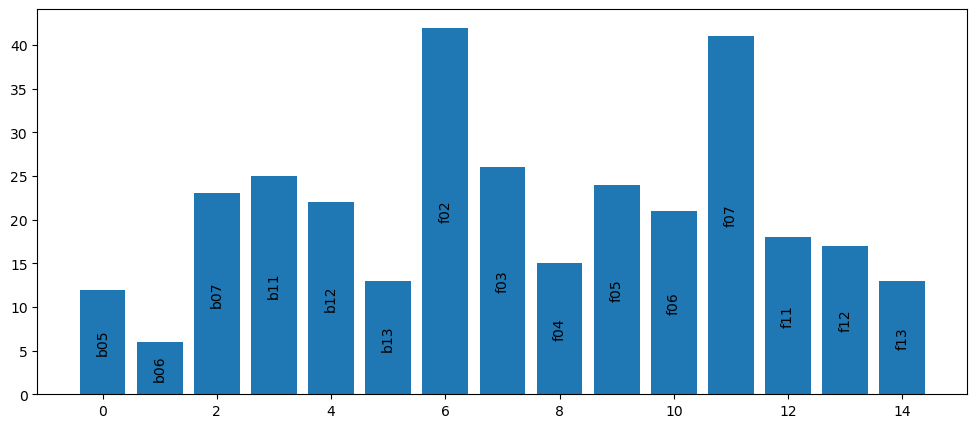

In [5]:
import matplotlib.pyplot as plt

# This is a list of unique values appearing in the input list
lii_unique = sorted(list(set(boards)))

# This is the corresponding count for each value
counts = [boards.count(value) for value in lii_unique]

plt.figure(figsize=(12,5))

barcontainer = plt.bar(range(len(lii_unique)),counts, width=0.8)

# Some labels and formatting to look more like the example
plt.bar_label(barcontainer,lii_unique, label_type='center', rotation = 'vertical', )
# plt.axis('off')
plt.show()

# Test

In [6]:
import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import sklearn as skl
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

In [7]:
df_alt.head()

,board,classes,prediction,pred_def,pred_non,match
0,b05_r1_sl1_d105.jpg,0,0,0.99993,0.000066,True
1,b05_r1_sl1_d285.jpg,0,0,0.98950,0.010500,True
2,b05_r1_sl1_d300.jpg,0,0,0.99750,0.002500,True
3,b05_r1_sl2_d165.jpg,0,1,0.22070,0.779300,False
4,b05_r1_sl2_d255.jpg,0,0,0.79880,0.201200,True


In [8]:
# Amount of pictures of test set miss classfied for each board
df_test = df_alt[['board', 'classes', 'prediction', 'match']]
mapping = {'Defective' : 0, 'NonDefective' : 1}
df_test = df_test.replace({'classes' : mapping})
df_test = df_test.replace({'prediction' : mapping})
df_test.head()

,board,classes,prediction,match
0,b05_r1_sl1_d105.jpg,0,0,True
1,b05_r1_sl1_d285.jpg,0,0,True
2,b05_r1_sl1_d300.jpg,0,0,True
3,b05_r1_sl2_d165.jpg,0,1,False
4,b05_r1_sl2_d255.jpg,0,0,True


In [9]:
cm = confusion_matrix(df_alt['classes'], df_alt['prediction'])

In [10]:
# default
TN, FP, FN, TP = confusion_matrix(df_alt['classes'], df_alt['prediction']).ravel()

<AxesSubplot: >

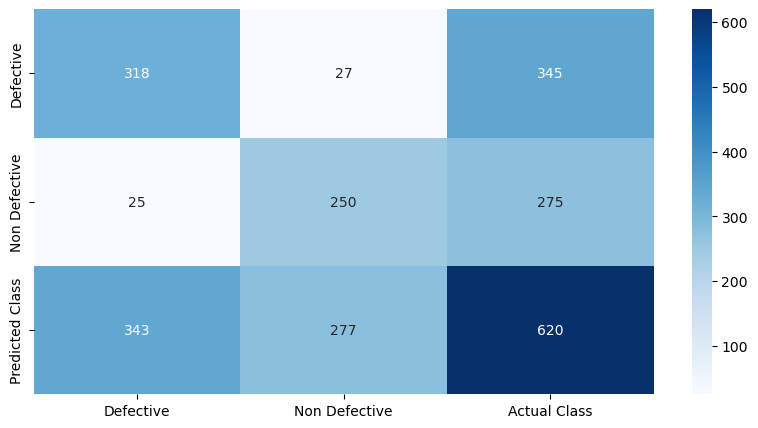

In [28]:
array =[[TN, FP, TN + FP], [FN, TP, FN + TP], [TN + FN, FP + TP, TN + FN + TP + FP]]
df_cm = pd.DataFrame(array, index = [i for i in ["Defective", "Non Defective", "Predicted Class"]],
                  columns = [i for i in ["Defective", "Non Defective", "Actual Class"]])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [12]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print('Accuracy of the binary classification = {:0.2f}%'.format(accuracy*100))

Accuracy of the binary classification = 91.61%


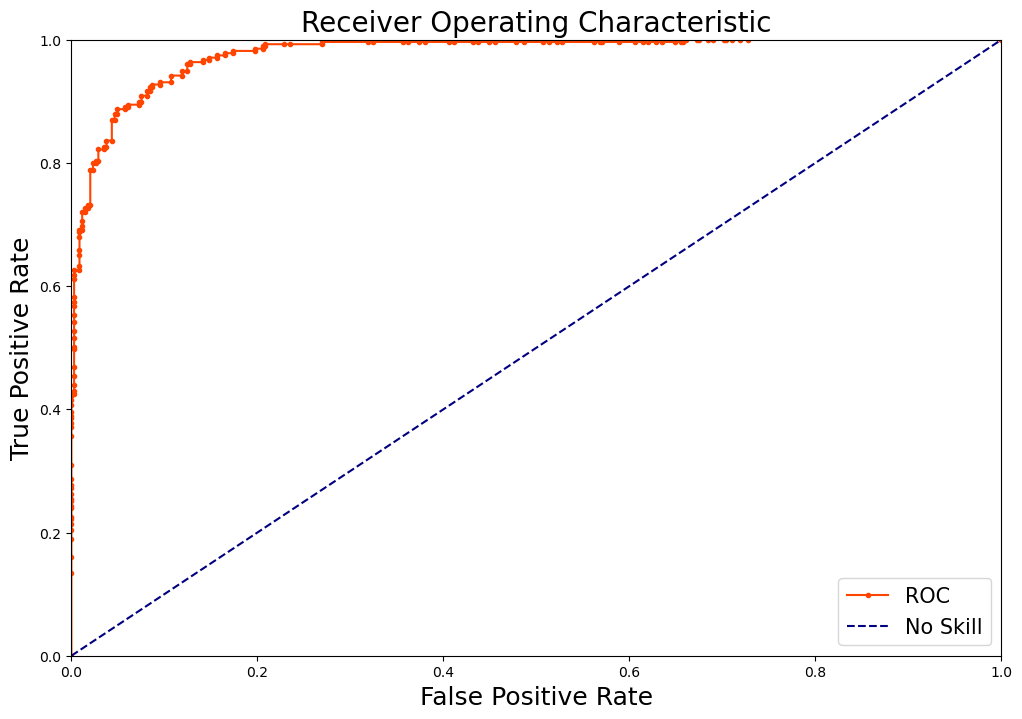

In [29]:
fpr, tpr, thresholds = roc_curve(df_alt['classes'], df_alt['pred_non'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic', size = 20)
plt.plot(fpr, tpr, 'orangered', marker = '.', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'navy', ls = '--', label = 'No Skill')
plt.legend(loc = 'lower right', prop={'size': 15})
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', size = 18)
plt.xlabel('False Positive Rate', size = 18)
plt.show()

In [14]:
roc_auc

0.9777602108036889

In [15]:
TPR = TP / (TP + FN)
print('True positive rate = {:0.4f}'.format(TPR))

True positive rate = 0.9091


In [16]:
FNR = FN / (TP + FN)
print('False negative rate = {:0.4f}'.format(FNR))

False negative rate = 0.0909


In [17]:
TNR = TN / (TN + FP)
print('True negative rate = {:0.4f}'.format(TNR))

True negative rate = 0.9217


In [18]:
FPR = FP / (TN + FP)
print('False positive rate = {:0.4f}'.format(FPR))

False positive rate = 0.0783


In [19]:
precision = TP / (TP + FP)
print('Precision of the binary classification = {:0.4f}'.format(precision))

Precision of the binary classification = 0.9025


In [20]:
recall = TP / (TP + FN)
print('Recall of the binary classification = {:0.4f}'.format(recall))

Recall of the binary classification = 0.9091


In [21]:
F1 = 2 / ((1 / precision) + (1 / recall))
print('F1 score of the binary classification = {:0.4f}'.format(F1))

F1 score of the binary classification = 0.9058
